In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year = 168*52
debete = 24*90+1
finete = year-debete

# Shedding

## Steel industry - shedding

In [3]:
def dr_indus(Wyear,frev,sutil,smax,smin):
    return (smax-smin)*Wyear/(8760*(1-frev)*sutil) *1e3

In [4]:
#2020
Aturbsteel = np.ones(year)
# DE + LU + BEL + NL + FR
capasteel = dr_indus(10277+1893+1694+109+4517,0.05,1,1,0)
prix = 411
duree = 4 #h
Nact = 50
caracsteel = [prix,capasteel,duree,Nact]
caracsteel

[411, 2221.821677481375, 4, 50]

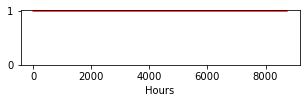

In [5]:
plt.figure(figsize=(5,1))
plt.plot(Aturbsteel,label="Available reduction",color='red')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1.01))
#plt.legend(loc='upper right')
plt.show()

## Aluminium industry

In [6]:
#2020
Aturbalu = np.ones(year)
capaalu = dr_indus(7861+0+0+1254+5028,0.05,0.95,1,0.75)
prix = 164
duree = 4 #h
Nact = 50
caracalu = [prix,capaalu,duree,Nact]
caracalu

[164, 447.22928445844246, 4, 50]

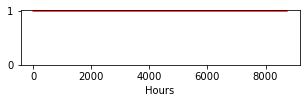

In [7]:
plt.figure(figsize=(5,1))
plt.plot(Aturbalu,label="Available reduction",color='red')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1.01))
#plt.legend(loc='upper right')
plt.show()

## Chlorine industry

In [8]:
#2020
Aturbchlorine = np.ones(year)
capachlorine = dr_indus(10622+0+2310+1631+3434,0.05,0.95,1,0.4) #MW
prix = 96
duree = 4 #h
Nact = 50
caracchlor = [prix,capachlorine,duree,Nact]
caracchlor

[96, 1365.8407012484347, 4, 50]

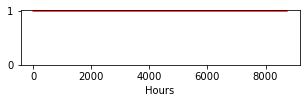

In [9]:
plt.figure(figsize=(5,1))
plt.plot(Aturbchlorine,label="Available reduction",color='red')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1.01))
#plt.legend(loc='upper right')
plt.show()

In [10]:
df_avail_shedding = pd.DataFrame({"Tech. 0":Aturbsteel,"Tech. 1":Aturbalu,"Tech. 2":Aturbchlorine})
df_avail_shedding.to_csv("loadshedding_availability.csv")

In [11]:
df_carac_shed = pd.DataFrame({"Steel":caracsteel,
                             "Aluminium":caracalu,
                             "Chlorine":caracchlor}, 
                             index = ["PrixAct","CapaInst","Duree","NAct"])
bon = df_carac_shed.T
bon

,PrixAct,CapaInst,Duree,NAct
Steel,411.0,2221.821677,4.0,50.0
Aluminium,164.0,447.229284,4.0,50.0
Chlorine,96.0,1365.840701,4.0,50.0


In [12]:
bon.to_csv("carac_shedding.csv")

In [13]:
bon['ResSize'] = bon['NAct'] * bon['CapaInst'] * bon['Duree']
bon

,PrixAct,CapaInst,Duree,NAct,ResSize
Steel,411.0,2221.821677,4.0,50.0,444364.335496
Aluminium,164.0,447.229284,4.0,50.0,89445.856892
Chlorine,96.0,1365.840701,4.0,50.0,273168.140250


In [14]:
cmoy = []
for i,tech in enumerate(list(bon.index)):
    cmoy.append(np.mean(bon['CapaInst'].loc[tech] * np.array(df_avail_shedding["Tech. %s"%i])))

In [15]:
bon['CapaMoy'] = cmoy
bon

,PrixAct,CapaInst,Duree,NAct,ResSize,CapaMoy
Steel,411.0,2221.821677,4.0,50.0,444364.335496,2221.821677
Aluminium,164.0,447.229284,4.0,50.0,89445.856892,447.229284
Chlorine,96.0,1365.840701,4.0,50.0,273168.140250,1365.840701


# Shifting

## Cement industry

In [16]:
weekend = [1 for i in range(24)]
weekdays = [1,1,1,1,1,1,0.95,0.85,0.75,0.7,0.66,0.66,0.66,0.75,0.75,0.75,0.66,0.7,0.85,0.95,1,1,1,1]
winter = 1
summer = 0.8

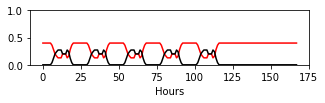

In [17]:
smin = 0.5
smax = 1
Aturbcement = []
Apumpcement = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.8
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = weekend[h % 24]
    elif day % 7 == 6:
        #dimanche
        d = weekend[h % 24]
    else:
        #weekdays
        d = weekdays[h % 24]

    Aturbcement.append(multsaison*(d-smin))
    Apumpcement.append(multsaison*(smax-d))
plt.figure(figsize=(5,1))
plt.plot(Aturbcement[:168],label="Available reduction",color='red')
plt.plot(Apumpcement[:168],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

In [18]:
capacement = dr_indus(4350+150+1062+644+2810,0.05,1,1,0)
prix = 10 #euro/MW
duree = 3 #h
Nact = 260
caraccement = [prix,capacement,duree,Nact]
caraccement

[10, 1083.3934150444604, 3, 260]

## Paper and pulp

In [19]:
capulp = dr_indus(2643+0+296+205+10598,0.05,1,1,0)
capap = dr_indus(6811+28+993+998+2572,0.05,1,1,0)
capaturb = 0.8*capulp + 0.2*capap
capapump = 0.2*capulp + 0.1*capap
capatot = capaturb + capapump
availturb = capaturb/capatot
availpump = capapump/capatot
Aturbpaper = availturb*np.ones(year)
Apumppaper = availpump*np.ones(year)
prix = 10 #euro/MW
duree = 3 #h
Nact = 260
caracpaper = [prix,capatot,duree,Nact]
caracpaper

[10, 2062.3167507810626, 3, 260]

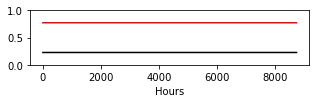

In [20]:
plt.figure(figsize=(5,1))
plt.plot(Aturbpaper,label="Available reduction",color='red')
plt.plot(Apumppaper,label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

## Industrial cooling

In [21]:
capainduscool = (10277+1893+1694+109+4517)/5840 * 1e3
prix = 16 #euro/MW
duree = 1 #h
Nact = 364
caracindcool = [prix,capainduscool,duree,Nact]
caracindcool

[16, 3166.095890410959, 1, 364]

In [22]:
Aturbindcool = []
Apumpindcool = []
intraday = [0.85,0.9,1,1,1,0.85,0.7,0.5,0.5,0.5,0.5,0.55,0.55,0.6,0.65,0.7,0.75,0.7,0.6,0.6,0.8,0.95,0.95,0.95]
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.95
    elif day % 7 == 6:
        #dimanche
        d = 0.9
    else:
        #weekdays
        d = 1
    intra = intraday[h % 24]
    Aturbindcool.append(0.5*multsaison*d*intra)
    Apumpindcool.append(0.1*(1-multsaison*d*intra))

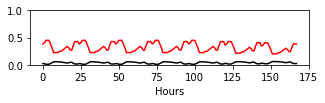

In [23]:
plt.figure(figsize=(5,1))
plt.plot(Aturbindcool[:168],label="Available reduction",color='red')
plt.plot(Apumpindcool[:168],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

## Cross-tech Ventilation

In [24]:
capavent = (2574+78+278+328+1596)/7008 * 1e3
prix = 16 #euro/MW
duree = 1 #h
Nact = 364
caracvent = [prix,capavent,duree,Nact]
caracvent

[16, 692.6369863013698, 1, 364]

In [25]:
Aturbvent = []
Apumpvent = []
for h in range(year):
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.6
    elif day % 7 == 6:
        #dimanche
        d = 0.5
    else:
        #weekdays
        d = 1
    Aturbvent.append(0.5*d)
    Apumpvent.append(0.1*(1-d))

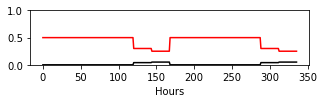

In [26]:
plt.figure(figsize=(5,1))
plt.plot(Aturbvent[:336],label="Available reduction",color='red')
plt.plot(Apumpvent[:336],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

## Tertiary cooling

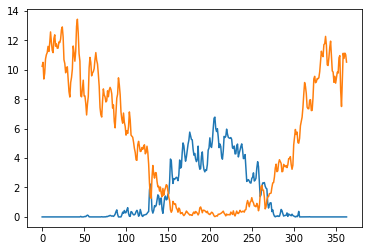

In [27]:
pops = {'FR':67422241,'LU':634730,'DE':83129285,'BEL':11431406,'NE':17483925,'tot':67422241+634730+83129285+11431406+17483925}
rapports_pop = {}
pays = list(pops.keys())[:5]
for p in pays:
    rapports_pop[p]=pops[p]/pops['tot']
rapports_pop
numCDDbyp = pd.read_excel('mCDD.xlsx')
numHDDbyp = pd.read_excel('mHDD.xlsx')
nCDD = np.zeros(364)
nHDD = np.zeros(364)
for p in pays:
    nCDD += np.array(rapports_pop[p]*numCDDbyp[p])
    nHDD += np.array(rapports_pop[p]*numHDDbyp[p])
plt.plot(nCDD)
plt.plot(nHDD)
plt.show()

In [28]:
print(np.sum(nCDD))
nflhAC = 500
shareACincomDem = 0.045
nflhretail = 5840 #indé temp
nflhresto = 5000 #indé temp
nflhcoldsto = 5000 #indé temp

510.7915688710093


In [29]:
Wcommerce = 161970*1e3 + 2580*1e3 + 146460*1e3 + 26100*1e3 + 39620*1e3#MWh

#food retail+hotels/restau, storage
capaappli = [ 0.087*0.75*Wcommerce/nflhretail + 0.087*0.15*Wcommerce/nflhresto,0.087*0.1*Wcommerce/nflhcoldsto] #MW
capaAC =  shareACincomDem*Wcommerce/nflhAC#MW
capaappli

[5192.448947260274, 655.5102]

In [30]:
capaAC

33905.7

In [31]:
indaycomcool = [0.80 for i in range(6)]+[0.89]+[1 for i in range(15)]+[0.89,0.80]
indaycoldstorage = [0.85,0.9,1,1,1,0.85,0.7,0.5,0.5,0.5,0.5,0.55,0.55,0.6,0.65,0.7,0.75,0.7,0.6,0.6,0.8,0.95,0.95,0.95]

In [32]:
Aturbcomcool = []
Apumpcomcool = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    Aturbcomcool.append(multsaison*indaycomcool[h%24])
    Apumpcomcool.append(multsaison*(1-indaycomcool[h%24]))

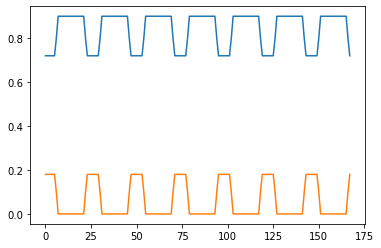

In [33]:
plt.plot(Aturbcomcool[:168])
plt.plot(Apumpcomcool[:168])

In [34]:
Aturbcolsto = []
Apumpcolsto = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.95
    elif day % 7 == 6:
        #dimanche
        d = 0.9
    else:
        #weekdays
        d = 1
    Aturbcolsto.append(multsaison*d*indaycoldstorage[h%24])
    Apumpcolsto.append(1-multsaison*d*indaycoldstorage[h%24])

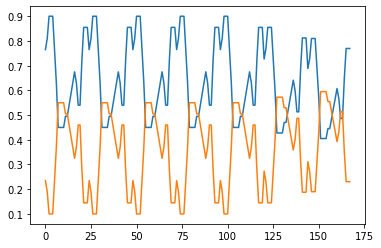

In [35]:
plt.plot(Aturbcolsto[:168])
plt.plot(Apumpcolsto[:168])

In [36]:
colddemday = np.zeros(364)
for i in range(1,364):
    colddemday[i] = ( nCDD[i] + 0.5*nCDD[i-1] ) / (1.5 * np.sum(nCDD))
maxcolddemday = np.max(colddemday)

usageAC = np.zeros(year)
for h in range(year):
    day = h // 24
    if colddemday[day] > 0.6*maxcolddemday:
        usageAC[h] = 0.75
    else:
        usageAC[h] = 1.25 * colddemday[day]/maxcolddemday
coefheure = np.array([12,10,7,5,4,3,7,9,11,15,24,33,46,64,82,95,100,98,84,59,48,32,24,17])/100

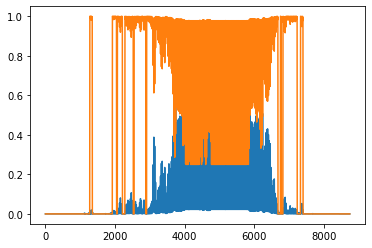

In [37]:
AturbAC = []
ApumpAC = []
for h in range(year):
    AturbAC.append(usageAC[h]*coefheure[h%24])
    ApumpAC.append(1-usageAC[h]*coefheure[h%24] if usageAC[h] > 0.01 else 0)
plt.plot(AturbAC)
plt.plot(ApumpAC)

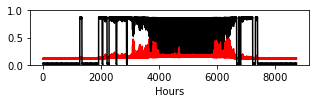

[11, 39753.659147260274, 1, 364]

In [64]:
#On aggrège les trois sources de flexibilité 
#dans le cooling tertiaire
capatertiarycool = capaAC + np.sum(capaappli)
Aturbtertiarycool = []
Apumptertiarycool = []
for h in range(year):
    Aturbtertiarycool.append((capaAC*AturbAC[h]+capaappli[0]*Aturbcomcool[h]+capaappli[1]*Aturbcolsto[h])/(capatertiarycool))
    Apumptertiarycool.append((capaAC*ApumpAC[h]+capaappli[0]*Apumpcomcool[h]+capaappli[1]*Apumpcolsto[h])/capatertiarycool)


plt.figure(figsize=(5,1))
plt.plot(Aturbtertiarycool[0:8736],label="Available reduction",color='red')
plt.plot(Apumptertiarycool[0:8736],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caractertiarycool = [prix,capatertiarycool,duree,Nact]
caractertiarycool

## Tertiary heating

In [39]:
print(np.sum(nHDD))
nflhSH = 450
nflhHW = 300

1878.3554742837828


In [40]:
shareSH = rapports_pop['FR']*0.05+rapports_pop['DE']*0.02 + (1-rapports_pop['FR']-rapports_pop['DE'])*0.035 #deux grands drivers du groupe
capaSH = shareSH*Wcommerce/nflhSH
capaHW = 0.015*Wcommerce/nflhHW
print([capaSH,capaHW])

[28206.04129596716, 18836.5]


In [41]:
heatdemday = np.zeros(364)
heatdemday[0] = nHDD[0] / np.sum(nHDD)
for i in range(1,364):
    heatdemday[i] = ( nHDD[i] + 0.5*nHDD[i-1] ) / (1.5 * np.sum(nHDD))
maxheatdemday = np.max(heatdemday)
usageheat = np.zeros(year)
c=0
for h in range(year):
    day = h // 24
    if heatdemday[day] > 0.6*maxheatdemday:
        usageheat[h] = 0.75
        c+=1
    else:
        usageheat[h] = 1.25 * heatdemday[day]/maxheatdemday

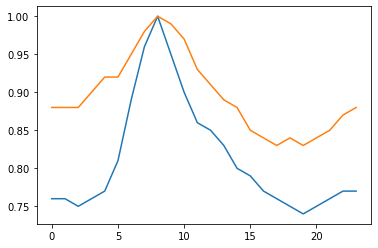

In [42]:
intradayHWweek = [0.76,0.76,0.75,0.76,0.77,0.81,0.89,0.96,1,0.95,0.9,0.86,0.85,0.83,0.8,0.79,0.77,0.76,0.75,0.74,0.75,0.76,0.77,0.77]
intradayHWend = [0.88,0.88,0.88,0.9,0.92,0.92,0.95,0.98,1,0.99,0.97,0.93,0.91,0.89,0.88,0.85,0.84,0.83,0.84,0.83,0.84,0.85,0.87,0.88]
plt.plot(intradayHWweek)
plt.plot(intradayHWend)

In [43]:
usagetempheat = pd.read_csv('usageheattemp.txt', sep=" ", header=None)
mine = usagetempheat.drop([0,6,12,13],axis=1)
mine.columns = ['<0 W','0-5 W','5-10 W','10-15 W','>15 W',
               '<0 E','0-5 E','5-10 E','10-15 E','>15 E']
isweek = [1,1,1,1,1,0,0]
mine

,<0 W,0-5 W,5-10 W,10-15 W,>15 W,<0 E,0-5 E,5-10 E,10-15 E,>15 E
0,0.73,0.69,0.68,0.65,0.76,0.84,0.83,0.82,0.82,0.88
1,0.72,0.68,0.66,0.63,0.76,0.82,0.80,0.80,0.81,0.88
2,0.71,0.69,0.68,0.64,0.75,0.84,0.82,0.80,0.82,0.88
3,0.73,0.69,0.69,0.66,0.76,0.84,0.83,0.82,0.83,0.90
4,0.75,0.72,0.71,0.68,0.77,0.85,0.85,0.83,0.83,0.92
5,0.80,0.77,0.76,0.74,0.81,0.87,0.87,0.84,0.86,0.92
6,0.88,0.87,0.87,0.86,0.89,0.91,0.92,0.90,0.93,0.95
7,0.96,0.97,0.96,0.97,0.96,0.95,0.96,0.95,0.97,0.98
8,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.98,0.99,1.00
9,1.00,0.99,0.97,0.94,0.95,1.00,1.00,1.00,1.00,0.99


In [44]:
tempsaverage=np.array(pd.read_csv('average_temp.csv')['0'].to_list())

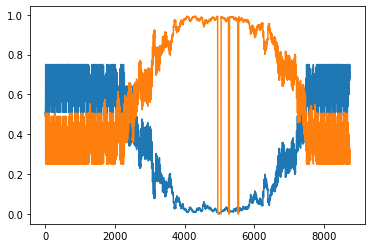

In [45]:
AturbSH=np.zeros(year)
AturbHW=np.zeros(year)
ApumpSH=np.zeros(year)
ApumpHW=np.zeros(year)
for h in range(year):
    day = h // 24
    daytype = day % 7
    tempsav = tempsaverage[day]
    if tempsav <0:
        AturbSH[h] = (isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])*usageheat[h]
        ApumpSH[h] = (1-(isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <5 and tempsav >0:
        AturbSH[h] = (isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <10 and tempsav >5:
        AturbSH[h] = (isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <15 and tempsav >10:
        AturbSH[h] = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav >15:
        AturbSH[h] = (isweek[daytype]*mine['>15 W'][h%24] + (1-isweek[daytype])*mine['>15 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['>15 W'][h%24] + (1-isweek[daytype])*mine['>15 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    AturbHW[h] = (isweek[daytype]*intradayHWweek[h%24] + (1-isweek[daytype])*intradayHWend[h%24])*(usageheat[h] if usageheat[h]>0.01 else 0)
    ApumpHW[h] = (1-(isweek[daytype]*intradayHWweek[h%24] + (1-isweek[daytype])*intradayHWend[h%24])*usageheat[h]) if usageheat[h]>0.01 else 0

plt.plot(AturbSH)
plt.plot(ApumpSH)
#plt.plot(AturbHW)
#plt.plot(ApumpHW)

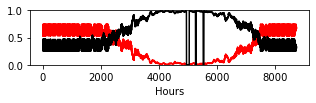

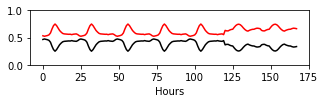

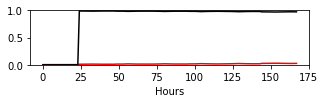

[11, 47042.54129596716, 4, 364]

In [46]:
#On aggrège les deux sources de flexibilité 
#dans le heating tertiaire
Aturbtertiaryheat = (capaSH*AturbSH + AturbHW * capaHW)/(capaSH + capaHW)
Apumptertiaryheat = (capaSH*ApumpSH + capaHW*ApumpHW)/(capaSH+capaHW)


plt.figure(figsize=(5,1))
plt.plot(Aturbtertiaryheat,label="Available reduction",color='red')
plt.plot(Apumptertiaryheat,label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(5,1))
plt.plot(Aturbtertiaryheat[:168],label="Available reduction",color='red')
plt.plot(Apumptertiaryheat[:168],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(5,1))
plt.plot(Aturbtertiaryheat[5016:5184],label="Available reduction",color='red')
plt.plot(Apumptertiaryheat[5016:5184],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()


capatertiaryheat = capaSH + capaHW
prix = 11 #euro/MW
duree = 4 #h
Nact = 364
caractertiaryheat = [prix,capatertiaryheat,duree,Nact]
caractertiaryheat

## Residential cooling

In [47]:
nHH = 30.83 * 1e6 + 40.66*1e6 + 5.27*1e6 + 0.25*1e6 + 8.2*1e6
appliancefreezer = rapports_pop['FR']*0.86+rapports_pop['DE']*0.68+rapports_pop['BEL']*0.62+rapports_pop['LU']*0.6+rapports_pop['NE']*0.55
appliancerefri = rapports_pop['FR']*1+rapports_pop['DE']*1.13+rapports_pop['BEL']*1.14+rapports_pop['LU']*1+rapports_pop['NE']*1
capfreeze=(appliancefreezer*40 + appliancerefri*300) *nHH/1e6
applianceAC = rapports_pop['FR']*0.05+rapports_pop['DE']*0.02+rapports_pop['BEL']*0.02+rapports_pop['LU']*0.02+rapports_pop['NE']*0.04
capAC=applianceAC * 4000*nflhAC/8760 * nHH/1e6 
caparescool = capfreeze + capAC #MW
prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caracrescool = [prix,caparescool,duree,Nact]
caracrescool

[11, 30459.80885356618, 1, 364]

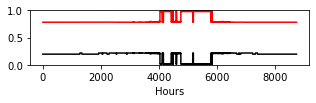

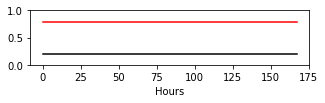

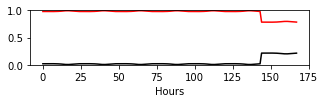

In [48]:
Aturbfreeze = np.ones(year)
for h in range(year):
    day=h//24
    if colddemday[day] < 0.6*maxcolddemday:
        Aturbfreeze[h] = 0.8
    else:
        Aturbfreeze[h] = 1

Apumpfreeze = 1-Aturbfreeze
Aturbrescool = (capfreeze*Aturbfreeze + capAC*np.array(AturbAC)) / caparescool
Apumprescool = (capfreeze*Apumpfreeze + capAC*np.array(ApumpAC)) / caparescool
plt.figure(figsize=(5,1))
plt.plot(Aturbrescool,label="Available reduction",color='red')
plt.plot(Apumprescool,label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(5,1))
plt.plot(Aturbrescool[:168],label="Available reduction",color='red')
plt.plot(Apumprescool[:168],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(5,1))
plt.plot(Aturbrescool[5016:5184],label="Available reduction",color='red')
plt.plot(Apumprescool[5016:5184],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

## Residential heating

In [49]:
applianceSH = rapports_pop['FR']*0.05+rapports_pop['DE']*0.04+rapports_pop['BEL']*0.05+rapports_pop['LU']*0.05+rapports_pop['NE']*0.05
applianceHW = rapports_pop['FR']*0.44+rapports_pop['DE']*0.11+rapports_pop['BEL']*0.26+rapports_pop['LU']*0.15+rapports_pop['NE']*0.09
appliancepump = rapports_pop['FR']*0.6+rapports_pop['DE']*0.6+rapports_pop['BEL']*0.6+rapports_pop['LU']*0.6+rapports_pop['NE']*0.6
nflhpump=rapports_pop['FR']*4918+rapports_pop['DE']*4877+rapports_pop['BEL']*4943+rapports_pop['LU']*5115+rapports_pop['NE']*4948
capresSH= applianceSH * 14000*nflhSH/8760 *nHH/1e6
capresHW=applianceHW * 2000*nflhHW/8760 *nHH/1e6
caprespump=appliancepump * 100*nflhpump/8760 *nHH/1e6 
caparesheat = capresSH + capresHW + caprespump #MW
prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caracresheat = [prix,caparesheat,duree,Nact]
caracresheat

[11, 7051.53666956895, 1, 364]

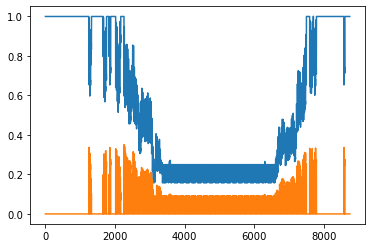

In [50]:
Aturbpump = np.zeros(year)
Apumppump = np.zeros(year)
for h in range(year):
    day = h // 24
    demchal = heatdemday[day]
    daytype = day % 7
    tempsav = tempsaverage[day]
    if tempsav <0:
        mult = (isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])
    if tempsav <5 and tempsav >0:
        mult = (isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])
    if tempsav <10 and tempsav >5:
        mult = (isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])
    if tempsav <15 and tempsav >10:
        mult = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])
    if tempsav >15:
        mult = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])
        
    if demchal < 0.15*maxheatdemday:
        Aturbpump[h] = 0.25 * mult
        Apumppump[h] = 0.25 * (1-mult)
    if demchal >0.15*maxheatdemday and demchal < 0.6*maxheatdemday:
        Aturbpump[h] = 1.67*demchal/maxheatdemday * mult
        Apumppump[h] = 1.67 * demchal/maxheatdemday*(1-mult)
    if demchal > 0.6*maxheatdemday:
        Aturbpump[h] = 1

plt.plot(Aturbpump)
plt.plot(Apumppump)

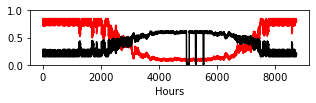

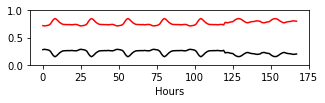

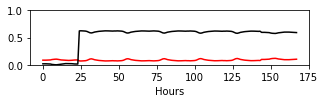

In [51]:
Aturbresheat = (capresHW*AturbHW + capresSH*AturbSH + caprespump*Aturbpump) / caparesheat
Apumpresheat = (capresHW*ApumpHW + capresSH*ApumpSH + caprespump*Apumppump) / caparesheat

plt.figure(figsize=(5,1))
plt.plot(Aturbresheat,label="Available reduction",color='red')
plt.plot(Apumpresheat,label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(5,1))
plt.plot(Aturbresheat[:168],label="Available reduction",color='red')
plt.plot(Apumpresheat[:168],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(5,1))
plt.plot(Aturbresheat[5016:5184],label="Available reduction",color='red')
plt.plot(Apumpresheat[5016:5184],label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

# Export des données

In [52]:
df_avail_pump_shift = pd.DataFrame({"Tech. 0":Apumpcement,
                                  "Tech. 1":Apumppaper,
                                  "Tech. 2":Apumpindcool,
                                  "Tech. 3":Apumpvent,
                                  "Tech. 4":Apumptertiarycool,
                                  "Tech. 5":Apumptertiaryheat,
                                  "Tech. 6":Apumprescool,
                                  "Tech. 7":Apumpresheat
                                 })
df_avail_pump_shift.to_csv("loadshifting_pump_availability.csv")

In [53]:
df_avail_shifting_turb = pd.DataFrame({"Tech. 0":Aturbcement,
                                       "Tech. 1":Aturbpaper,
                                       "Tech. 2":Aturbindcool,
                                       "Tech. 3":Aturbvent,
                                       "Tech. 4":Aturbtertiarycool,
                                       "Tech. 5":Aturbtertiaryheat,
                                       "Tech. 6":Aturbrescool,
                                       "Tech. 7":Aturbresheat
                                 })

df_avail_shifting_turb.to_csv("loadshifting_turb_availability.csv")

In [54]:
df_carac_shift = pd.DataFrame({"Cement":caraccement,
                             "Paper and pulp":caracpaper,
                             "Indus cooling":caracindcool,
                             "Cross-tech ventilation":caracvent,
                             "Tertiary cooling":caractertiarycool,
                             "Tertiary heating":caractertiaryheat,
                            "Residential cooling":caracrescool,
                             "Residential heating":caracresheat}, 
                             index = ["PrixAct","CapaInst","Duree","NAct"])
bon = df_carac_shift.T
bon

,PrixAct,CapaInst,Duree,NAct
Cement,10.0,1083.393415,3.0,260.0
Paper and pulp,10.0,2062.316751,3.0,260.0
Indus cooling,16.0,3166.095890,1.0,364.0
Cross-tech ventilation,16.0,692.636986,1.0,364.0
Tertiary cooling,11.0,39753.659147,1.0,364.0
Tertiary heating,11.0,47042.541296,4.0,364.0
Residential cooling,11.0,30459.808854,1.0,364.0
Residential heating,11.0,7051.536670,1.0,364.0


In [55]:
bon.to_csv("carac_shifting.csv")

In [56]:
bon['ResSize'] = bon['NAct'] * bon['CapaInst'] * bon['Duree']
bon

,PrixAct,CapaInst,Duree,NAct,ResSize
Cement,10.0,1083.393415,3.0,260.0,8.450469e+05
Paper and pulp,10.0,2062.316751,3.0,260.0,1.608607e+06
Indus cooling,16.0,3166.095890,1.0,364.0,1.152459e+06
Cross-tech ventilation,16.0,692.636986,1.0,364.0,2.521199e+05
Tertiary cooling,11.0,39753.659147,1.0,364.0,1.447033e+07
Tertiary heating,11.0,47042.541296,4.0,364.0,6.849394e+07
Residential cooling,11.0,30459.808854,1.0,364.0,1.108737e+07
Residential heating,11.0,7051.536670,1.0,364.0,2.566759e+06


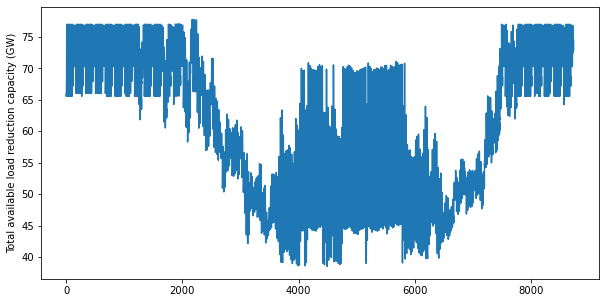

In [57]:
total_dr_turb = np.zeros(8736)
for i,tech in enumerate(df_carac_shift.T.index):
    total_dr_turb+= df_carac_shift.T['CapaInst'].loc[tech] * np.array(df_avail_shifting_turb["Tech. %s"%i])
for i,tech in enumerate(df_carac_shed.T.index):
    total_dr_turb+= df_carac_shed.T['CapaInst'].loc[tech] * np.array(df_avail_shedding["Tech. %s"%i])

plt.figure(figsize=(10,5))
plt.plot(total_dr_turb/1e3)
plt.ylabel("Total available load reduction capacity (GW)")
plt.show()

In [58]:
cmoy = []
for i,tech in enumerate(list(bon.index)):
    cmoy.append(np.mean(bon['CapaInst'].loc[tech] * np.array(df_avail_shifting_turb["Tech. %s"%i])))

In [59]:
bon['CapaMoy']=cmoy

In [60]:
885+bon['CapaMoy'].sum()

56068.87305689131

In [61]:
135+ 0+ 18 +198 +1000 +87+ 170+ 409 +272+ 0+ 24 +302 +91 +1078+ 144+ 216+ 2095+ 332+ 498+ 100+ 2032+ 644+ 293+ 418+ 87+ 922

11565

In [62]:
bon

,PrixAct,CapaInst,Duree,NAct,ResSize,CapaMoy
Cement,10.0,1083.393415,3.0,260.0,8.450469e+05,390.521161
Paper and pulp,10.0,2062.316751,3.0,260.0,1.608607e+06,1595.049267
Indus cooling,16.0,3166.095890,1.0,364.0,1.152459e+06,1082.883893
Cross-tech ventilation,16.0,692.636986,1.0,364.0,2.521199e+05,301.791830
Tertiary cooling,11.0,39753.659147,1.0,364.0,1.447033e+07,7962.069163
Tertiary heating,11.0,47042.541296,4.0,364.0,6.849394e+07,15974.208565
Residential cooling,11.0,30459.808854,1.0,364.0,1.108737e+07,24873.494621
Residential heating,11.0,7051.536670,1.0,364.0,2.566759e+06,3003.854557
